## A basic framework for implementing Autoregressive (AR) models for time series forecasting in Python

- Autoregression (AR) is a type of time series model used for predicting future values based on past values. It assumes that the current value of the series is a linear combination of its previous values, plus a random error term. The basic idea is to exploit the temporal dependence in data where the value at time 
𝑡
t can be explained by its own previous values.

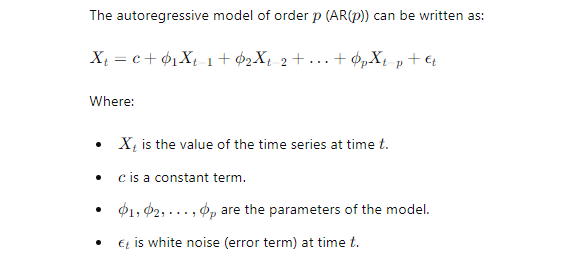
### Key points about autoregression:

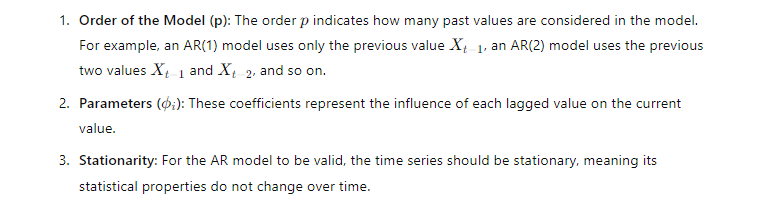

## Example: AR(1) Model
Assume we have a time series which follows an AR(1) model. The AR(1) model is given by:
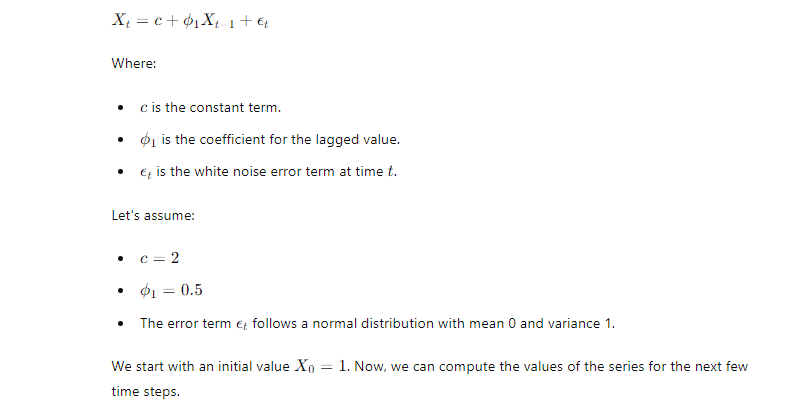

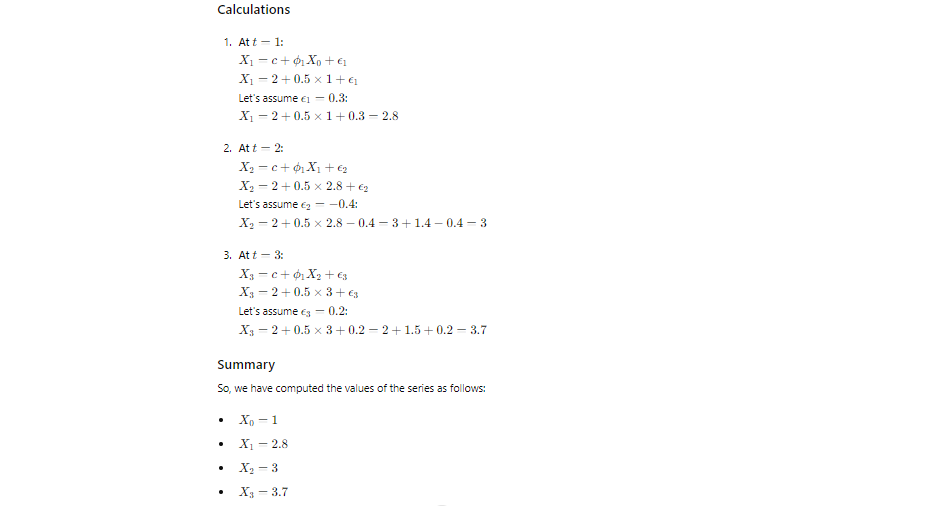

In [1]:
import numpy as np

def generate_ar1(c, phi1, initial_value, num_steps):
    # Initialize array to store generated values
    series = np.zeros(num_steps)
    series[0] = initial_value
    
    # Generate values for the time series
    for t in range(1, num_steps):
        # Generate random noise from a normal distribution
        epsilon = np.random.normal(0, 1)
        # Calculate value for current time step using AR(1) equation
        series[t] = c + phi1 * series[t-1] + epsilon
    
    return series

# Parameters
c = 2
phi1 = 0.5
initial_value = 1
num_steps = 10

# Generate AR(1) series
ar1_series = generate_ar1(c, phi1, initial_value, num_steps)

# Print generated series
print("Generated AR(1) series:")
for t, value in enumerate(ar1_series):
    print(f"X_{t}: {value}")


Generated AR(1) series:
X_0: 1.0
X_1: 1.2830002748998819
X_2: 3.3627992112434155
X_3: 4.1444971762426315
X_4: 4.19502293821529
X_5: 4.589078451003513
X_6: 5.6508589650811
X_7: 5.588680656850469
X_8: 3.790909401364064
X_9: 3.948559905121994


## statsmodels library in Python to create an AR(1) model and generate sample data. 

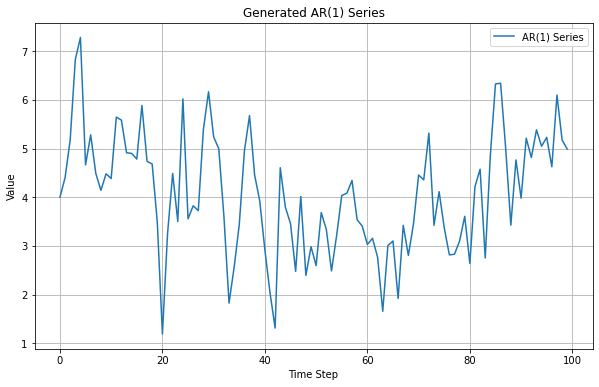

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -139.753
Method:               Conditional MLE   S.D. of innovations              0.993
Date:                Tue, 28 May 2024   AIC                            285.505
Time:                        18:23:23   BIC                            293.290
Sample:                             1   HQIC                           288.655
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6939      0.347      4.879      0.000       1.013       2.374
y.L1           0.5858      0.082      7.160      0.000       0.425       0.746
                                    Roots           

In [5]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
c = 2
phi1 = 0.5
num_steps = 100

# Generate AR(1) series
epsilon = np.random.normal(0, 1, num_steps)
X = np.zeros(num_steps)
X[0] = c / (1 - phi1)  # Set initial value using steady state value
for t in range(1, num_steps):
    X[t] = c + phi1 * X[t-1] + epsilon[t]

# Plot the generated series
plt.figure(figsize=(10, 6))
plt.plot(X, label='AR(1) Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Generated AR(1) Series')
plt.legend()
plt.grid(True)
plt.show()

# Fit AR(1) model using statsmodels AutoReg
ar_model = AutoReg(X, lags=1)  # Fit AR(1) model
ar_results = ar_model.fit()

# Print model summary
print(ar_results.summary())



- Dep. Variable:
This section specifies the dependent variable used in the model. In this case, it's labeled as "y".
- No. Observations:
Indicates the number of observations in the dataset used to fit the model. Here, it's 100.
- Model:
Specifies the type of model used. In this case, it's an AutoReg(1) model, which means it's an autoregressive model of order 1.
- Log Likelihood:
This is the value of the log-likelihood function at the maximum likelihood estimates of the parameters. It measures the goodness-of-fit of the model. A higher log-likelihood indicates a better fit.
- Method:
Indicates the method used for parameter estimation. In this case, it's "Conditional MLE", which stands for Conditional Maximum - Likelihood Estimation.
- S.D. of innovations:
Represents the standard deviation of the innovations (residuals) of the model. It gives an idea of the spread of the errors around the fitted values.
- AIC (Akaike Information Criterion):
AIC is a measure of the model's goodness-of-fit, penalized for the number of parameters in the model. Lower AIC values indicate a better trade-off between model fit and complexity.
- BIC (Bayesian Information Criterion):
Similar to AIC, BIC is another measure of model goodness-of-fit, but it penalizes more heavily for model complexity. It often results in more parsimonious models compared to AIC.
- Sample:
Specifies the range of observations used in the estimation. In this case, it's from observation 1 to 100.
- Coefficients:
Lists the estimated coefficients of the model.
- const: Represents the intercept term.
- y.L1: Represents the coefficient for the lag 1 term of the autoregressive process.
- Standard Error:
Provides the standard errors associated with the estimated coefficients.
- z-Value and P>|z|:
These values are associated with the significance tests for the coefficients.
The z-value is the ratio of the estimated coefficient to its standard error.
- P>|z| is the p-value associated with the null hypothesis that the coefficient is equal to zero. Lower p-values indicate greater significance.
- Confidence Intervals [0.025 0.975]:
Provides the 95% confidence intervals for the estimated coefficients.
Roots:
- ists the roots of the autoregressive polynomial. In this case, the AR polynomial has one real root at approximately 1.7072.

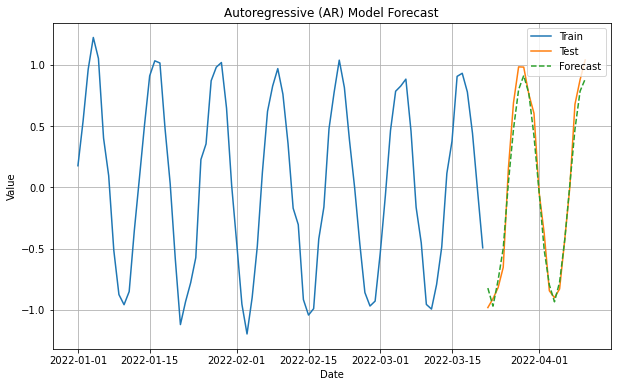

Mean Squared Error (MSE): 0.0145


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
noise = np.random.normal(loc=0, scale=0.1, size=len(dates))
series = np.sin(np.arange(len(dates)) * np.pi / 6) + noise

# Create pandas DataFrame with a DateTime index having a frequency set
df = pd.DataFrame({'Value': series}, index=dates)
df.index.freq = 'D'  # Set the frequency to daily

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit Autoregressive (AR) model
lags = 10  # Number of lagged observations to include in the model
model = AutoReg(train['Value'], lags=lags)
model_fit = model.fit()

# Forecast
forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Autoregressive (AR) Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['Value'], forecast)
print('Mean Squared Error (MSE): {:.4f}'.format(mse))
